# Histograms from raw current data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

from ont_fast5_api.fast5_interface import get_fast5_file

from itertools import cycle
color_cycle = cycle(['r', 'g', 'b', 'orange'])
FS = 12 # fontsize

In [1]:
def read_fast5(fname, single_or_multi_read, get_read_ids=False):
    'from !bsc_szakdoga/github/python_scripts/fast5_analysis.ipynb  + get_read_ids'
    from ont_fast5_api.fast5_interface import get_fast5_file
    def raw_to_current(rawdata, offset, range_, digitisation):
        return list((np.array(rawdata) + offset) * range_ / digitisation)
    
    if single_or_multi_read not in ['s', 'm']:
        raise ValueError('single_or_multi variable must be "s" or "m".')
    data = []
    read_ids = []
    with get_fast5_file(fname, mode="r") as f:
        for read in f.get_reads():
            ch=read.get_channel_info()
            data.append(raw_to_current(read.get_raw_data(), ch['offset'], ch['range'], ch['digitisation']))
            if single_or_multi_read=='s':
                read_ids.append(read.read_id)
            if single_or_multi_read=='m':
                read_ids.append(read.read_id)
    if single_or_multi_read == 's':
        if get_read_ids:
            return np.array(data[0]), read_ids
        return np.array(data[0]) # single read --> dim=1
    elif single_or_multi_read == 'm':
        if get_read_ids:
            return np.array(data, dtype='object'), read_ids
        return np.array(data, dtype='object')
    
def find_indices_of_top_n_largest(numbers, top_n=10):
    # Pair each number with its index
    indexed_numbers = list(enumerate(numbers))
    # Sort the list by the numbers in descending order
    indexed_numbers.sort(key=lambda x: x[1], reverse=True)
    # Extract the indices of the top 10 largest numbers
    return [index for index, number in indexed_numbers[:top_n]]

---
# Uracil

In [3]:
path_to_Uracil = ('/v/volumes/nanopore/timin_uracil/0420Uracil/no_sample/' +
                 '20230420_1145_MC-114328_aob675_389979c6/fast5_pass/')
fnames_U = glob(path_to_Uracil+'*')s

In [4]:
Uracil = read_fast5(fnames_U[0], 'm')
Uracil.shape

(397,)

In [5]:
lenghts_U = []
for i in range(Uracil.shape[0]):
    lenghts_U.append(len(Uracil[i]))
idx_U = find_indices_of_top_n_largest(lenghts_U, 30)

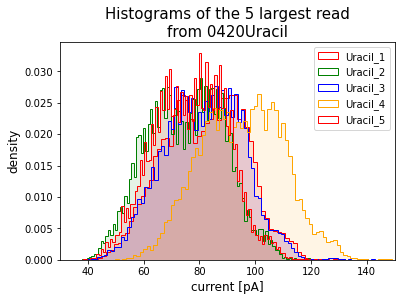

In [6]:
#plt.figure(figsize=(12,8))
N = 5
for i, color in zip(range(N), color_cycle):
    #print(len(Uracil[idx_U][i]))
    plt.hist(Uracil[idx_U][i], bins=120, density=True, color=color, alpha=0.1)
    plt.hist(Uracil[idx_U][i], bins=120, density=True, histtype='step',
             linewidth=1, edgecolor=color, fill=False, label=f'Uracil_{i+1}')
    plt.title(f'Histograms of the {N} largest read\nfrom 0420Uracil', fontsize=FS+3)
    plt.xlabel('current [pA]', fontsize=FS)
    plt.ylabel('density', fontsize=FS)
    plt.xlim(30,150)
    plt.legend(fontsize=FS-2)

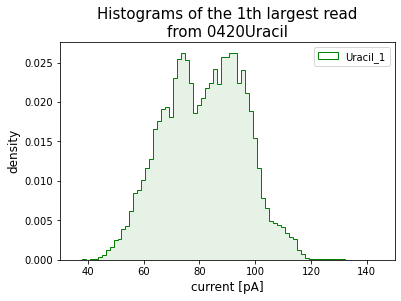

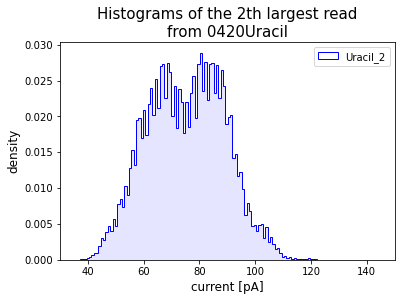

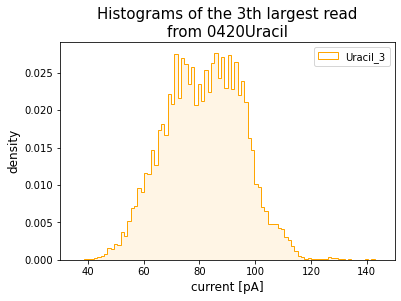

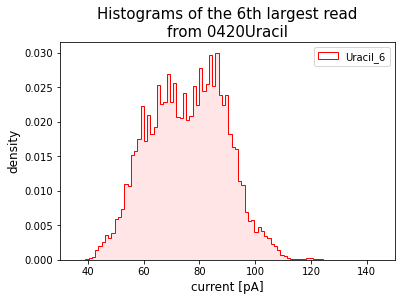

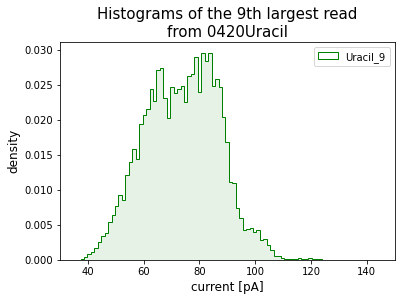

In [7]:
nth_histogram = [0,1,2,5,8]
for i, color in zip(nth_histogram, color_cycle):
    #print(len(Uracil[idx_U][i]))
    plt.hist(Uracil[idx_U][i], bins=120, density=True, color=color, alpha=0.1)
    plt.hist(Uracil[idx_U][i], bins=120, density=True, histtype='step',
             linewidth=1, edgecolor=color, fill=False, label=f'Uracil_{i+1}')
    plt.title(f'Histograms of the {i+1}th largest read\nfrom 0420Uracil', fontsize=FS+3)
    plt.xlabel('current [pA]', fontsize=FS)
    plt.ylabel('density', fontsize=FS)
    plt.xlim(30,150)
    plt.legend(fontsize=FS-2)
    plt.show()

---
# Timin


In [8]:
path_to_Thymine = ('/v/volumes/nanopore/timin_uracil/0421Timin/no_sample/' +
                 '20230421_1152_MC-114328_aoa546_235c7b69/fast5_pass/')
fnames_T = glob(path_to_Thymine+'*')
len_fnames_T = len(fnames_T)
len_fnames_T # multi reads

22

In [9]:
Thymine = read_fast5(fnames_T[0], 'm')
Thymine.shape

(1000,)

In [10]:
lenghts_T = []
for i in range(Thymine.shape[0]):
    lenghts_T.append(len(Thymine[i]))
idx_T= find_indices_of_top_n_largest(lenghts_T, 30)

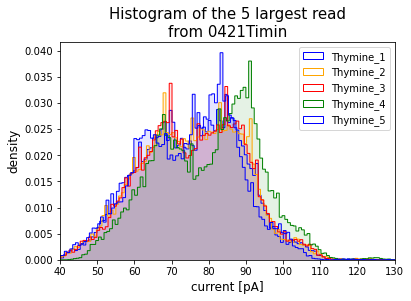

In [11]:
#plt.figure(figsize=(12,8))
N = 5
for i, color in zip(range(N), color_cycle):
    #print(len(Thymine[idx_T][i]))
    plt.hist(Thymine[idx_T][i], bins=2000, density=True, color=color, alpha=0.1)
    plt.hist(Thymine[idx_T][i], bins=2000, density=True, histtype='step', 
             linewidth=1, edgecolor=color, fill=False, label=f'Thymine_{i+1}')
    plt.title(f'Histogram of the {N} largest read\nfrom 0421Timin', fontsize=FS+3)
    plt.xlabel('current [pA]', fontsize=FS)
    plt.ylabel('density', fontsize=FS)
    plt.xlim(40,130)
    plt.legend(fontsize=FS-2, loc='upper right')

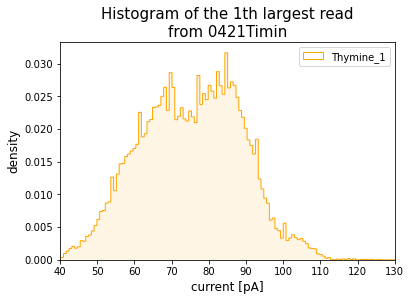

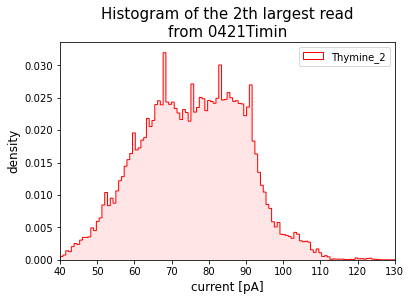

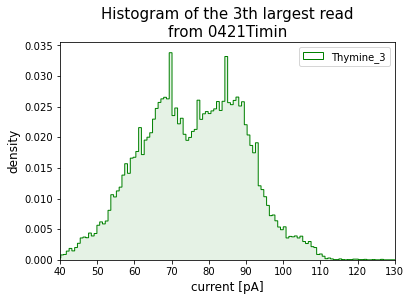

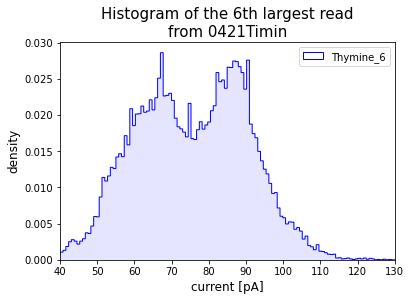

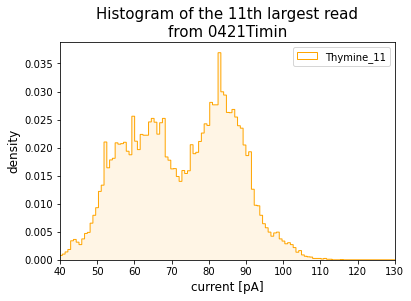

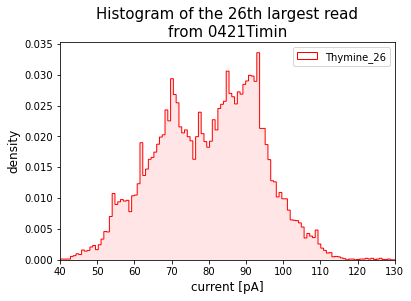

In [12]:
nth_histogram = [0,1,2,5,10,25]
for i, color in zip(nth_histogram, color_cycle):
    #print(len(Thymine[idx_T][i]))
    plt.hist(Thymine[idx_T][i], bins=2000, density=True, color=color, alpha=0.1)
    plt.hist(Thymine[idx_T][i], bins=2000, density=True, histtype='step', 
             linewidth=1, edgecolor=color, fill=False, label=f'Thymine_{i+1}')
    plt.title(f'Histogram of the {i+1}th largest read\nfrom 0421Timin', fontsize=FS+3)
    plt.xlabel('current [pA]', fontsize=FS)
    plt.ylabel('density', fontsize=FS)
    plt.xlim(40,130)
    plt.legend(fontsize=FS-2, loc='upper right')
    plt.show()